In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [65]:
consumption = pd.read_csv('Tables/consumption.csv')
consumption.head()

,Product,Week Ending,Consumption,region
0,33 KH DINNER 32 PK,2015-01-11,0.000000,Total US
1,34 KH Orig Dnr 32pk 7343507032,2015-01-11,0.000000,Total US
2,11 KH DINNER 24 PK,2015-01-11,245373.288047,Total US
3,22 KH Orig Dnr 24pk 7343500230,2015-01-11,241644.094664,Total US
4,29 KH Svry Btr Dnr 24pk 7343500233,2015-01-11,3729.193383,Total US


In [66]:
consumption2020 = consumption[(consumption['Week Ending'] >= '2020-01-01') & (consumption['region'] != 'Total US') & (consumption['Product'] == "04 Total King's Hawaiian")].reset_index(drop = True)
consumption2020.head()

,Product,Week Ending,Consumption,region
0,04 Total King's Hawaiian,2020-01-05,5248.740901,"Albany, NY"
1,04 Total King's Hawaiian,2020-01-12,3455.471274,"Albany, NY"
2,04 Total King's Hawaiian,2020-01-19,3618.533985,"Albany, NY"
3,04 Total King's Hawaiian,2020-01-26,3311.732942,"Albany, NY"
4,04 Total King's Hawaiian,2020-02-02,6517.155440,"Albany, NY"


In [67]:
regionList = consumption2020['region'].unique()
regionList

array(['Albany, NY', 'Atlanta, GA', 'Baltimore, MD/Washington D.C.',
       'Birmingham/Montgomery, AL', 'Boise, ID', 'Boston, MA',
       'Buffalo/Rochester, NY', 'Charlotte, NC', 'Chicago, IL',
       'Cincinnati/Dayton, OH', 'Cleveland, OH', 'Columbus, OH',
       'Dallas/Ft. Worth, TX', 'Denver, CO', 'Des Moines, IA',
       'Detroit, MI', 'Grand Rapids, MI', 'Green Bay, WI',
       'Harrisburg/Scranton, PA', 'Hartford, CT/Springfield, MA',
       'Houston, TX', 'Indianapolis, IN', 'Jacksonville, FL',
       'Kansas City, KS', 'Knoxville, TN', 'Las Vegas, NV',
       'Little Rock, AR', 'Los Angeles, CA', 'Louisville, KY',
       'Memphis, TN', 'Miami/Ft. Lauderdale, FL', 'Milwaukee, WI',
       'Minneapolis/St. Paul, MN', 'Mississippi', 'Nashville, TN',
       'New England', 'New Orleans, LA/Mobile, AL', 'New York, NY',
       'Oklahoma City, OK', 'Omaha, NE', 'Orlando, FL',
       'Peoria/Springfield, IL', 'Philadelphia, PA', 'Phoenix/Tucson, AZ',
       'Pittsburgh, PA', 'Portlan

In [68]:
testList = ['Memphis, TN','St. Louis, MO','Richmond/Norfolk, VA','Atlanta, GA','Birmingham/Montgomery, AL','Louisville, KY',\
           'Minneapolis/St. Paul, MN','Wichita, KS','Mississippi','Tulsa, OK','Raleigh/Greensboro, NC','Oklahoma City, OK',\
           'Knoxville, TN','Dallas/Ft. Worth, TX','Roanoke, VA','Columbus, OH','Los Angeles, CA','Toledo, OH','Phoenix/Tucson, AZ',\
            'Sacramento, CA','Houston, TX','Detroit, MI','Grand Rapids, MI','Milwaukee, WI','Syracuse, NY','Harrisburg/Scranton, PA',\
           'Salt Lake City, UT','Spokane, WA', 'Albany, NY','New York, NY','Providence, RI','Denver, CO']
controlList = [i for i in regionList if i not in testList]
controlList

['Baltimore, MD/Washington D.C.',
 'Boise, ID',
 'Boston, MA',
 'Buffalo/Rochester, NY',
 'Charlotte, NC',
 'Chicago, IL',
 'Cincinnati/Dayton, OH',
 'Cleveland, OH',
 'Des Moines, IA',
 'Green Bay, WI',
 'Hartford, CT/Springfield, MA',
 'Indianapolis, IN',
 'Jacksonville, FL',
 'Kansas City, KS',
 'Las Vegas, NV',
 'Little Rock, AR',
 'Miami/Ft. Lauderdale, FL',
 'Nashville, TN',
 'New England',
 'New Orleans, LA/Mobile, AL',
 'Omaha, NE',
 'Orlando, FL',
 'Peoria/Springfield, IL',
 'Philadelphia, PA',
 'Pittsburgh, PA',
 'Portland, OR',
 'San Diego, CA',
 'San Francisco/Oakland, CA',
 'Seattle/Tacoma, WA',
 'South Carolina',
 'Tampa/St. Petersburg, FL',
 'West Texas/New Mexico']

In [69]:
len(testList)

32

In [70]:
consumption2020.loc[consumption2020['region'].isin(testList), 'Group'] ='Test'
consumption2020.loc[consumption2020['region'].isin(controlList), 'Group'] ='Control'
consumption2020

,Product,Week Ending,Consumption,region,Group
0,04 Total King's Hawaiian,2020-01-05,5248.740901,"Albany, NY",Test
1,04 Total King's Hawaiian,2020-01-12,3455.471274,"Albany, NY",Test
2,04 Total King's Hawaiian,2020-01-19,3618.533985,"Albany, NY",Test
3,04 Total King's Hawaiian,2020-01-26,3311.732942,"Albany, NY",Test
4,04 Total King's Hawaiian,2020-02-02,6517.155440,"Albany, NY",Test
...,...,...,...,...,...
2363,04 Total King's Hawaiian,2020-08-16,8095.627089,"Wichita, KS",Test
2364,04 Total King's Hawaiian,2020-08-23,8460.854208,"Wichita, KS",Test
2365,04 Total King's Hawaiian,2020-08-30,8786.029804,"Wichita, KS",Test
2366,04 Total King's Hawaiian,2020-09-06,9810.610356,"Wichita, KS",Test


In [71]:
consumption2020.groupby('Group')['Consumption'].mean()

Group
Control    28984.421248
Test       32076.242121
Name: Consumption, dtype: float64

In [72]:
consumption2020.groupby('Group')['Consumption'].std()

Group
Control    20165.490595
Test       32187.545230
Name: Consumption, dtype: float64

In [73]:
t,p = stats.ttest_ind(
        consumption2020.loc[consumption2020['Group'] == 'Test','Consumption'].values,
        consumption2020.loc[consumption2020['Group'] == 'Control','Consumption'].values,
        equal_var = False)

p

# p < 0.05 throughout the year, it is statistically different between Test and Control group's consumption
# mainly due to the largest sales region - LA is in Test group.

0.0051446517365432865

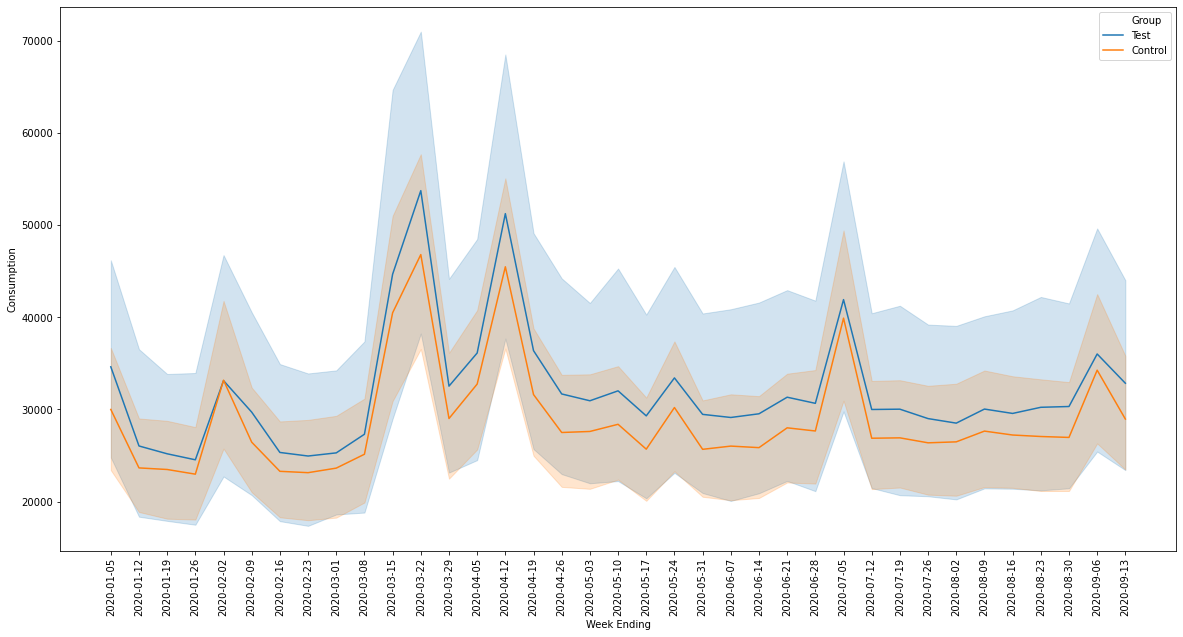

In [74]:
plt.figure(figsize = (20,10))
sns.lineplot(data = consumption2020,
            x = 'Week Ending',
            y = 'Consumption',
            hue = 'Group')


plt.xticks(rotation = 90)

plt.legend()

In [75]:
# Exclude LA

consumption2020_noLA = consumption2020[consumption2020['region'] != 'Los Angeles, CA']
consumption2020_noLA.head()

,Product,Week Ending,Consumption,region,Group
0,04 Total King's Hawaiian,2020-01-05,5248.740901,"Albany, NY",Test
1,04 Total King's Hawaiian,2020-01-12,3455.471274,"Albany, NY",Test
2,04 Total King's Hawaiian,2020-01-19,3618.533985,"Albany, NY",Test
3,04 Total King's Hawaiian,2020-01-26,3311.732942,"Albany, NY",Test
4,04 Total King's Hawaiian,2020-02-02,6517.155440,"Albany, NY",Test


In [76]:
consumption2020_noLA.groupby('Group')['Consumption'].mean()

Group
Control    28984.421248
Test       27955.943193
Name: Consumption, dtype: float64

In [77]:
consumption2020_noLA.groupby('Group')['Consumption'].std()

Group
Control    20165.490595
Test       22103.758885
Name: Consumption, dtype: float64

In [78]:
t,p = stats.ttest_ind(
        consumption2020_noLA.loc[consumption2020_noLA['Group'] == 'Test','Consumption'].values,
        consumption2020_noLA.loc[consumption2020_noLA['Group'] == 'Control','Consumption'].values,
        equal_var = False)

p

# After removing LA, p > 0.05 throughout the year.
# Hence, it is not statistically different between Test and Control group's consumption

0.24111514849406906

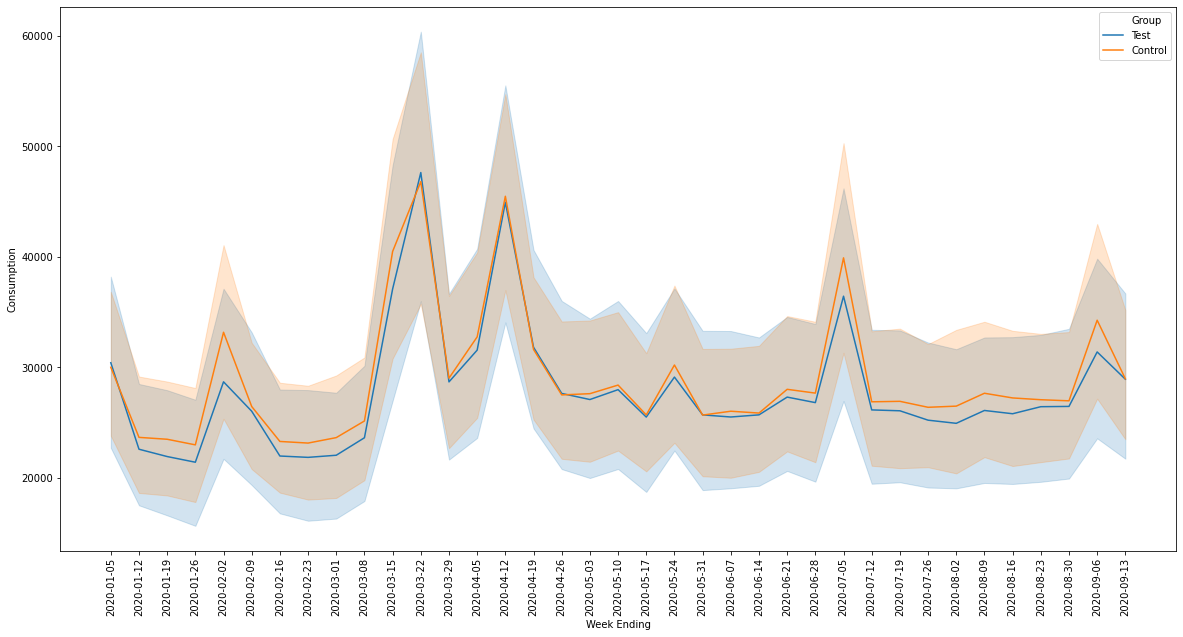

In [79]:
plt.figure(figsize = (20,10))
sns.lineplot(data = consumption2020_noLA,
            x = 'Week Ending',
            y = 'Consumption',
            hue = 'Group')


plt.xticks(rotation = 90)

plt.legend()

In [80]:
consumption2020_noLA_fromJune = consumption2020_noLA[consumption2020_noLA['Week Ending'] >= '2020-06-22']

In [81]:
consumption2020_noLA_fromJune.groupby('Group')['Consumption'].mean()

Group
Control    28863.109418
Test       27556.117720
Name: Consumption, dtype: float64

In [82]:
consumption2020_noLA_fromJune.groupby('Group')['Consumption'].std()

Group
Control    19566.274857
Test       20805.688946
Name: Consumption, dtype: float64

In [83]:
t,p = stats.ttest_ind(
        consumption2020_noLA_fromJune.loc[consumption2020_noLA_fromJune['Group'] == 'Test','Consumption'].values,
        consumption2020_noLA_fromJune.loc[consumption2020_noLA_fromJune['Group'] == 'Control','Consumption'].values,
        equal_var = False)

p

# After removing LA and only looking at week ending after 2020-06-22, p > 0.05 as well.
# Hence, it is not statistically different between Test and Control group's consumption

0.37419947714407353

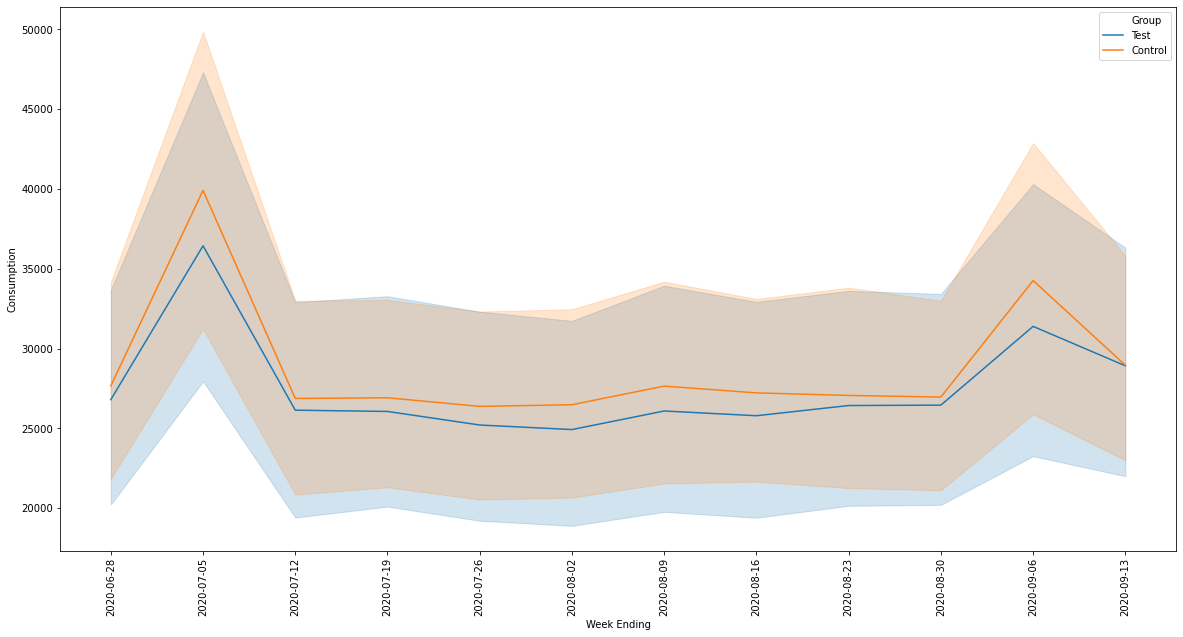

In [84]:
plt.figure(figsize = (20,10))
sns.lineplot(data = consumption2020_noLA_fromJune,
            x = 'Week Ending',
            y = 'Consumption',
            hue = 'Group')


plt.xticks(rotation = 90)

plt.legend()

In [87]:
i = 1
for week in consumption2020['Week Ending'].unique():
    consumption2020.loc[consumption2020['Week Ending']==week,'Week Number'] = i
    i+=1
consumption2020.head()

,Product,Week Ending,Consumption,region,Group,Week Number
0,04 Total King's Hawaiian,2020-01-05,5248.740901,"Albany, NY",Test,1.0
1,04 Total King's Hawaiian,2020-01-12,3455.471274,"Albany, NY",Test,2.0
2,04 Total King's Hawaiian,2020-01-19,3618.533985,"Albany, NY",Test,3.0
3,04 Total King's Hawaiian,2020-01-26,3311.732942,"Albany, NY",Test,4.0
4,04 Total King's Hawaiian,2020-02-02,6517.155440,"Albany, NY",Test,5.0


In [30]:
consumption2019 = consumption[(consumption['Week Ending'] < '2020-01-01') & (consumption['Week Ending'] >= '2019-01-01') &(consumption['region'] != 'Total US') & (consumption['Product'] == "04 Total King's Hawaiian")].reset_index(drop = True)
consumption2019.loc[consumption2019['region'].isin(testList), 'Group'] ='Test'
consumption2019.loc[consumption2019['region'].isin(controlList), 'Group'] ='Control'
consumption2019.head()

,Product,Week Ending,Consumption,region,Group
0,04 Total King's Hawaiian,2019-01-06,4767.205844,"Albany, NY",Test
1,04 Total King's Hawaiian,2019-01-13,3330.128261,"Albany, NY",Test
2,04 Total King's Hawaiian,2019-01-20,4120.784130,"Albany, NY",Test
3,04 Total King's Hawaiian,2019-01-27,3126.880202,"Albany, NY",Test
4,04 Total King's Hawaiian,2019-02-03,4629.826696,"Albany, NY",Test


In [88]:
i = 1
for week in consumption2019['Week Ending'].unique():
    consumption2019.loc[consumption2019['Week Ending']==week,'Week Number'] = i
    i+=1
consumption2019.head()

,Product,Week Ending,Consumption,region,Group,Week Number
0,04 Total King's Hawaiian,2019-01-06,4767.205844,"Albany, NY",Test,1.0
1,04 Total King's Hawaiian,2019-01-13,3330.128261,"Albany, NY",Test,2.0
2,04 Total King's Hawaiian,2019-01-20,4120.784130,"Albany, NY",Test,3.0
3,04 Total King's Hawaiian,2019-01-27,3126.880202,"Albany, NY",Test,4.0
4,04 Total King's Hawaiian,2019-02-03,4629.826696,"Albany, NY",Test,5.0


In [90]:
consumption19_20 = pd.merge(consumption2019,consumption2020, on = ['Week Number', 'Group','region'])
consumption19_20

,Product_x,Week Ending_x,Consumption_x,region,Group,Week Number,Product_y,Week Ending_y,Consumption_y
0,04 Total King's Hawaiian,2019-01-06,4767.205844,"Albany, NY",Test,1.0,04 Total King's Hawaiian,2020-01-05,5248.740901
1,04 Total King's Hawaiian,2019-01-13,3330.128261,"Albany, NY",Test,2.0,04 Total King's Hawaiian,2020-01-12,3455.471274
2,04 Total King's Hawaiian,2019-01-20,4120.784130,"Albany, NY",Test,3.0,04 Total King's Hawaiian,2020-01-19,3618.533985
3,04 Total King's Hawaiian,2019-01-27,3126.880202,"Albany, NY",Test,4.0,04 Total King's Hawaiian,2020-01-26,3311.732942
4,04 Total King's Hawaiian,2019-02-03,4629.826696,"Albany, NY",Test,5.0,04 Total King's Hawaiian,2020-02-02,6517.155440
...,...,...,...,...,...,...,...,...,...
2363,04 Total King's Hawaiian,2019-08-18,7556.836425,"Wichita, KS",Test,33.0,04 Total King's Hawaiian,2020-08-16,8095.627089
2364,04 Total King's Hawaiian,2019-08-25,7190.443130,"Wichita, KS",Test,34.0,04 Total King's Hawaiian,2020-08-23,8460.854208
2365,04 Total King's Hawaiian,2019-09-01,7787.576655,"Wichita, KS",Test,35.0,04 Total King's Hawaiian,2020-08-30,8786.029804
2366,04 Total King's Hawaiian,2019-09-08,7814.114563,"Wichita, KS",Test,36.0,04 Total King's Hawaiian,2020-09-06,9810.610356


In [91]:
consumption19_20 = consumption19_20[['Week Number','Group','region', 'Week Ending_x', 'Consumption_x','Week Ending_y', 'Consumption_y']].\
                    rename(columns = {'Week Ending_x':'Week Ending_2019','Consumption_x': 'Consumption_2019',\
                                     'Week Ending_y':'Week Ending_2020','Consumption_y':'Consumption_2020'})

consumption19_20

,Week Number,Group,region,Week Ending_2019,Consumption_2019,Week Ending_2020,Consumption_2020
0,1.0,Test,"Albany, NY",2019-01-06,4767.205844,2020-01-05,5248.740901
1,2.0,Test,"Albany, NY",2019-01-13,3330.128261,2020-01-12,3455.471274
2,3.0,Test,"Albany, NY",2019-01-20,4120.784130,2020-01-19,3618.533985
3,4.0,Test,"Albany, NY",2019-01-27,3126.880202,2020-01-26,3311.732942
4,5.0,Test,"Albany, NY",2019-02-03,4629.826696,2020-02-02,6517.155440
...,...,...,...,...,...,...,...
2363,33.0,Test,"Wichita, KS",2019-08-18,7556.836425,2020-08-16,8095.627089
2364,34.0,Test,"Wichita, KS",2019-08-25,7190.443130,2020-08-23,8460.854208
2365,35.0,Test,"Wichita, KS",2019-09-01,7787.576655,2020-08-30,8786.029804
2366,36.0,Test,"Wichita, KS",2019-09-08,7814.114563,2020-09-06,9810.610356


In [92]:
consumption19_20['Increase'] = consumption19_20['Consumption_2020'] - consumption19_20['Consumption_2019']
consumption19_20['Increase(%)'] = round((consumption19_20['Consumption_2020'] - consumption19_20['Consumption_2019'])/consumption19_20['Consumption_2019']*100,2)
consumption19_20

,Week Number,Group,region,Week Ending_2019,Consumption_2019,Week Ending_2020,Consumption_2020,Increase,Increase(%)
0,1.0,Test,"Albany, NY",2019-01-06,4767.205844,2020-01-05,5248.740901,481.535057,10.10
1,2.0,Test,"Albany, NY",2019-01-13,3330.128261,2020-01-12,3455.471274,125.343013,3.76
2,3.0,Test,"Albany, NY",2019-01-20,4120.784130,2020-01-19,3618.533985,-502.250145,-12.19
3,4.0,Test,"Albany, NY",2019-01-27,3126.880202,2020-01-26,3311.732942,184.852740,5.91
4,5.0,Test,"Albany, NY",2019-02-03,4629.826696,2020-02-02,6517.155440,1887.328743,40.76
...,...,...,...,...,...,...,...,...,...
2363,33.0,Test,"Wichita, KS",2019-08-18,7556.836425,2020-08-16,8095.627089,538.790664,7.13
2364,34.0,Test,"Wichita, KS",2019-08-25,7190.443130,2020-08-23,8460.854208,1270.411078,17.67
2365,35.0,Test,"Wichita, KS",2019-09-01,7787.576655,2020-08-30,8786.029804,998.453149,12.82
2366,36.0,Test,"Wichita, KS",2019-09-08,7814.114563,2020-09-06,9810.610356,1996.495793,25.55


In [94]:
consumption19_20_afterJune = consumption19_20[consumption19_20['Week Ending_2020'] >= '2020-06-22']
consumption19_20_afterJune

,Week Number,Group,region,Week Ending_2019,Consumption_2019,Week Ending_2020,Consumption_2020,Increase,Increase(%)
25,26.0,Test,"Albany, NY",2019-06-30,3517.537398,2020-06-28,4865.206822,1347.669424,38.31
26,27.0,Test,"Albany, NY",2019-07-07,4806.815509,2020-07-05,6192.492775,1385.677266,28.83
27,28.0,Test,"Albany, NY",2019-07-14,3237.056563,2020-07-12,4748.001086,1510.944523,46.68
28,29.0,Test,"Albany, NY",2019-07-21,3552.631546,2020-07-19,4796.055165,1243.423618,35.00
29,30.0,Test,"Albany, NY",2019-07-28,3348.933649,2020-07-26,4567.568792,1218.635143,36.39
...,...,...,...,...,...,...,...,...,...
2363,33.0,Test,"Wichita, KS",2019-08-18,7556.836425,2020-08-16,8095.627089,538.790664,7.13
2364,34.0,Test,"Wichita, KS",2019-08-25,7190.443130,2020-08-23,8460.854208,1270.411078,17.67
2365,35.0,Test,"Wichita, KS",2019-09-01,7787.576655,2020-08-30,8786.029804,998.453149,12.82
2366,36.0,Test,"Wichita, KS",2019-09-08,7814.114563,2020-09-06,9810.610356,1996.495793,25.55


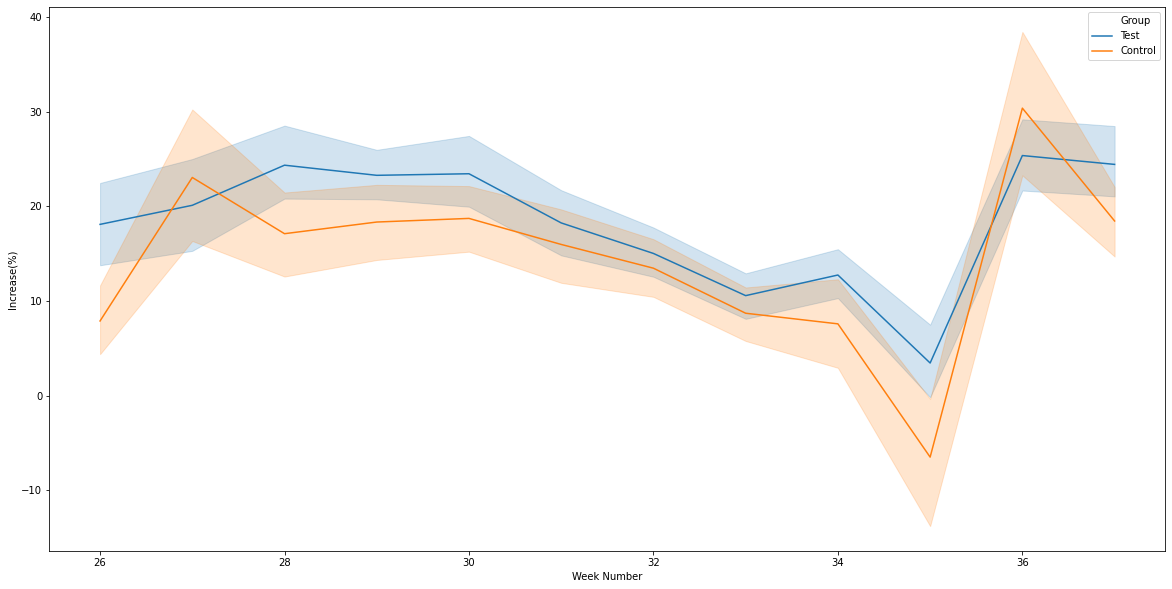

In [100]:
plt.figure(figsize = (20,10))
sns.lineplot(data = consumption19_20_afterJune,
            x= 'Week Number',
            y = 'Increase(%)',
            hue = 'Group')

In [96]:
consumption19_20_afterJune.groupby('Group')['Increase(%)'].mean()

Group
Control    14.443750
Test       18.269427
Name: Increase(%), dtype: float64

In [101]:
consumption19_20_afterJune.groupby('Group')['Increase(%)'].std()

Group
Control    16.435247
Test       12.209805
Name: Increase(%), dtype: float64

In [102]:
# H0: Percentage of increase of consumption for test and control group after June 2020 is not statistically different
# Ha: Percentage of Increase of consumption for test group after June 2020 is higher than increase for control group

t,p = stats.ttest_ind(
        consumption19_20_afterJune.loc[consumption19_20_afterJune['Group'] == 'Test','Increase(%)'].values,
        consumption19_20_afterJune.loc[consumption19_20_afterJune['Group'] == 'Control','Increase(%)'].values,
        equal_var = False)

p

0.0002693922676830271

In [103]:
# H0: Increase of consumption for test and control group after June 2020 is not statistically different
# Ha: Increase of consumption for test group after June 2020 is higher than increase for control group

t,p = stats.ttest_ind(
        consumption19_20_afterJune.loc[consumption19_20_afterJune['Group'] == 'Test','Increase'].values,
        consumption19_20_afterJune.loc[consumption19_20_afterJune['Group'] == 'Control','Increase'].values,
        equal_var = False)

p

0.034165186592726535

In [ ]:
# Conclusion: 
# Utilizing of digital marketing would elevate the consumption increasing rate by 4%, 
# which is 26.5% higher than the increasing rate of control group